In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

import time

from sklearn.impute import SimpleImputer
from sklearn.datasets import fetch_openml, load_iris

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA, FastICA
from sklearn.manifold import MDS,Isomap,TSNE

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.model_selection import train_test_split,  KFold, cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,roc_auc_score,roc_curve,auc

#Logistic Regression:
from sklearn.linear_model import LogisticRegression
#Support Vector Machines (SVM):
from sklearn.svm import SVC
#Random Forest:
from sklearn.ensemble import RandomForestClassifier
#K-Nearest Neighbors (KNN):
from sklearn.neighbors import KNeighborsClassifier
#Decision Tree:
from sklearn.tree import DecisionTreeClassifier
#Gradient Boosting:
from sklearn.ensemble import GradientBoostingClassifier
#Gaussian Naive Bayes:
from sklearn.naive_bayes import GaussianNB
#AdaBoost:
from sklearn.ensemble import AdaBoostClassifier
#MLP
from sklearn.neural_network import MLPClassifier

In [2]:
df = pd.read_csv('Datasets/heart_attack.csv')
X =  df.drop(['output'], axis=1,inplace=False)
y = np.array(df['output'])
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [3]:
X.shape

(303, 13)

In [4]:
y.shape

(303,)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
algs = {
    'LogisticRegression': LogisticRegression(random_state=42, max_iter=1000),
    'SVC': SVC(random_state=42, probability=True),
    'RandomForestClassifier': RandomForestClassifier(random_state=42),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(random_state=42),
    'GradientBoostingClassifier': GradientBoostingClassifier(random_state=42),
    'GaussianNB': GaussianNB(),
    'AdaBoostClassifier': AdaBoostClassifier(random_state=42),
    'MLPClassifier':MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
}

alg_names=['LogisticRegression','SVC','RandomForestClassifier',
            'KNeighborsClassifier','DecisionTreeClassifier','GradientBoostingClassifier',
            'GaussianNB', 'AdaBoostClassifier', 'MLPClassifier']

In [7]:
def usando_algoritmos(X, y, alg_names, algs):

    start_time = time.time()
    mean_value = []
    for alg_name in alg_names:
        scores_list = []
        cm_list = []

        alg = algs[alg_name]
        cv = KFold(n_splits=5, random_state=0, shuffle=True)

        # Executar a validação cruzada e obter as pontuações de validação cruzada
        scores = cross_val_score(alg, X, y, cv=cv, scoring="accuracy")
        scores_list.append(scores)

        scores_array = np.array(scores_list)
        # Calcular a média das pontuações
        mean_scores = np.mean(scores_array)
        mean_value.append(round(mean_scores,3)*100)
        # Calcular o desvio padrão das pontuações
        std_scores = np.std(scores_array)

        # Fazer previsões usando o algo
        y_pred = cross_val_predict(alg, X, y, cv=cv)

        # Calcular a matriz de confusão
        cm = confusion_matrix(y, y_pred)
        cm_list.append(cm)

        end_time = time.time()
        duration = end_time - start_time
        # Reinicia o tempo de início para o próximo loop
        start_time = time.time()


        print("Algoritmo:", alg_name)
        print(f"Tempo: {round(duration, 3)} segundos")
        print("Pontuações de Validação Cruzada:", [round(score, 3) for score in scores])
        print("Média das Pontuações:", round(mean_scores,3))
        # print("Desvio Padrão das Pontuações:",round(std_scores,3))
        # print("Matriz de Confusão:")
        # print(cm)
        print("-------------------------------------")


    return mean_value



In [8]:
y_probs = [0] * len(alg_names)
roc_auc = [0] * len(alg_names)
fpr = [0] * len(alg_names)
tpr = [0] * len(alg_names)
for i, alg_name in enumerate(alg_names):
    model = algs[alg_name]
    model.fit(X_train, y_train)
    y_probs[i] = model.predict_proba(X_test)[:, 1]

    fpr[i], tpr[i], thresholds = roc_curve(y_test, y_probs[i])
    roc_auc[i] = auc(fpr[i], tpr[i])

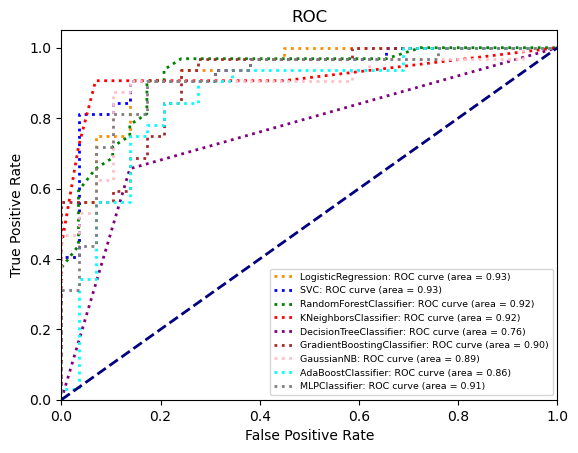

In [9]:
cores = ['darkorange', 'blue', 'green', 'red', 'purple', 'brown', 'pink', 'cyan', 'gray']
plt.figure()
plt.rc('legend', fontsize=6.8)
for j, model_name in enumerate(alg_names):
    plt.plot(fpr[j], tpr[j], color=cores[j],linestyle=':', lw=2, label=f'{model_name}: ROC curve (area = %0.2f)' % roc_auc[j])
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [10]:
resultados = usando_algoritmos(X, y, alg_names, algs)

Algoritmo: LogisticRegression
Tempo: 0.039 segundos
Pontuações de Validação Cruzada: [0.852, 0.803, 0.82, 0.833, 0.85]
Média das Pontuações: 0.832
-------------------------------------
Algoritmo: SVC
Tempo: 0.133 segundos
Pontuações de Validação Cruzada: [0.869, 0.77, 0.803, 0.85, 0.817]
Média das Pontuações: 0.822
-------------------------------------
Algoritmo: RandomForestClassifier
Tempo: 1.412 segundos
Pontuações de Validação Cruzada: [0.836, 0.689, 0.82, 0.867, 0.85]
Média das Pontuações: 0.812
-------------------------------------
Algoritmo: KNeighborsClassifier
Tempo: 0.036 segundos
Pontuações de Validação Cruzada: [0.82, 0.77, 0.852, 0.85, 0.783]
Média das Pontuações: 0.815
-------------------------------------
Algoritmo: DecisionTreeClassifier
Tempo: 0.019 segundos
Pontuações de Validação Cruzada: [0.77, 0.639, 0.754, 0.783, 0.667]
Média das Pontuações: 0.723
-------------------------------------
Algoritmo: GradientBoostingClassifier
Tempo: 0.885 segundos
Pontuações de Valida

In [11]:
alg_names2=['LR','SVC','RForest',
            'KNN','DecTree','GradB',
            'GaNB', 'AdaBoost', 'MLP']

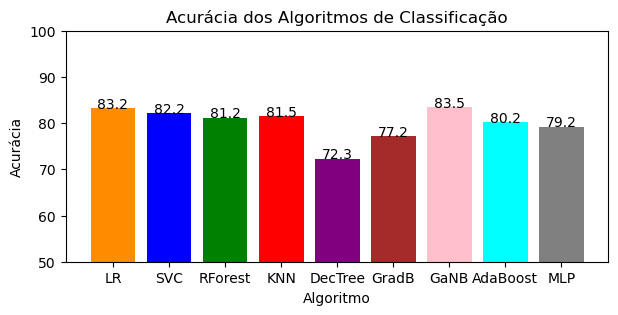

In [12]:
plt.figure(figsize=(7, 3))
plt.bar(alg_names2, resultados, color=cores)

# Configurações do gráfico
plt.xlabel('Algoritmo')
plt.ylabel('Acurácia')
plt.title('Acurácia dos Algoritmos de Classificação')
plt.ylim(50, 100)

# Mostra o valor da acurácia acima de cada barra
for i, accuracy in enumerate(resultados):
    plt.text(i, accuracy + 0.01, f'{accuracy:.1f}', ha='center')

# Exibe o gráfico
plt.show()

In [13]:
pca = PCA(n_components=2)
pca.fit(X)
Xs_pca = pca.transform(X)

In [14]:
# y_probs = [0] * len(alg_names)
# roc_auc = [0] * len(alg_names)
# fpr = [0] * len(alg_names)
# tpr = [0] * len(alg_names)
# for i, alg_name in enumerate(alg_names):
#     model = algs[alg_name]

#     y_probs[i] = cross_val_predict(model, Xs_pca, y, cv=5, method='predict_proba')[:, 1]

#     fpr[i], tpr[i], thresholds = roc_curve(y, y_probs[i])
#     auc2 = roc_auc_score(y, y_probs[i])
#     print(round(auc2,3))

#     roc_auc[i] = auc(fpr[i], tpr[i])
# cores = ['darkorange', 'blue', 'green', 'red', 'purple', 'brown', 'pink', 'cyan', 'gray']
# plt.figure()
# plt.rc('legend', fontsize=6.8)
# for j, model_name in enumerate(alg_names):
#     plt.plot(fpr[j], tpr[j], color=cores[j],linestyle=':', lw=2, label=f'{model_name}: ROC curve (area = %0.2f)' % roc_auc[j])
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC - PCA')
# plt.legend(loc="lower right")
# plt.show()

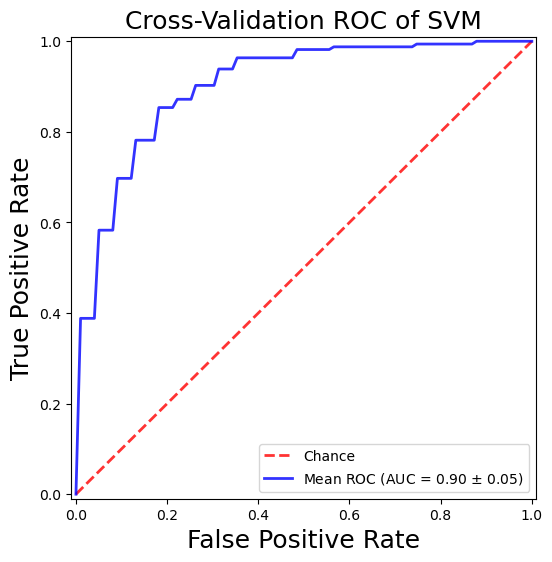

In [15]:
cv = StratifiedKFold(n_splits=6)
classifier = SVC(kernel="linear", probability=True, random_state=42)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
plt.figure(figsize=(6, 6))

for i, (train, test) in enumerate(cv.split(X, y)):
    probas_ = classifier.fit(X[train], y[train]).predict_proba(X[test])
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)


plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)


plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Cross-Validation ROC of SVM', fontsize=18)

legend = plt.legend(loc="lower right", prop={'size': 10})
legend.get_frame().set_facecolor('white')

plt.show()


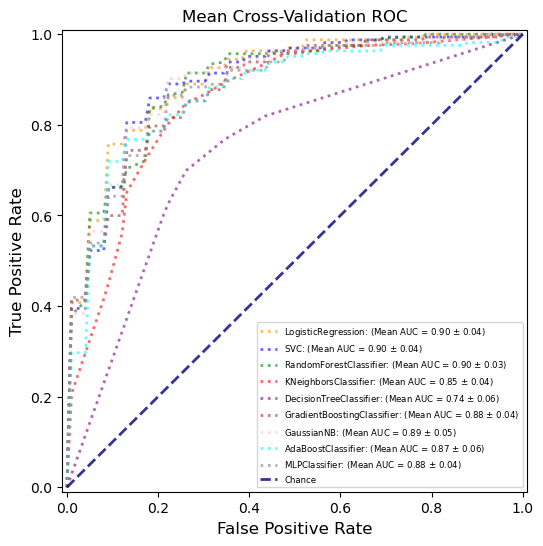

In [17]:
plt.figure(figsize=(6, 6))
for i, alg_name in enumerate(alg_names):
    model = algs[alg_name]

    cv = StratifiedKFold(n_splits=6)

    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    for (train, test) in cv.split(X, y):
        probas_ = model.fit(X[train], y[train]).predict_proba(X[test])
        fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
        tprs.append(np.interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    plt.plot(mean_fpr, mean_tpr, color=cores[i],
            label=f'{alg_name}: (Mean AUC = {mean_auc:0.2f} $\pm$ {std_auc:0.2f})',
            lw=2, 
            alpha=.6,
            linestyle=':')

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='navy',
            label='Chance', alpha=.8)
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Mean Cross-Validation ROC', fontsize=12)

legend = plt.legend(loc="lower right", prop={'size': 6.2})
legend.get_frame().set_facecolor('white')

plt.show()